Part 1 – Exploratory Data Analysis and Baseline Models 

In [1]:
# python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats
import seaborn as sns

In [2]:
train = pd.read_csv(r'D:\Downloads\genes_train.csv')
test = pd.read_csv(r'D:\Downloads\genes_test.csv')


In [3]:
train.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,ALL
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,ALL
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,ALL
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,ALL


In [87]:
train.shape

(40, 7131)

The training set has just 40 measurements and 7131 features. It is an unbalanced data set. 

In [126]:
train['cancer type'].value_counts()

ALL    29
AML    11
Name: cancer type, dtype: int64

The number of patients with ALL are 29 and and the patients with AML are 11. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

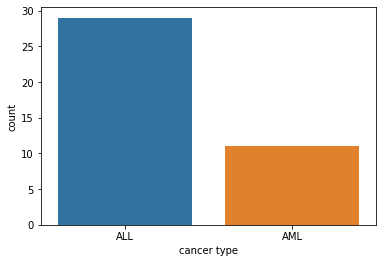

In [89]:
sns.countplot(train['cancer type'])

The output seems unbalanced because there are lot more patients with ALL compared to AML patients. 

In [ ]:
train.max(axis = 1)

In [ ]:
train.min(axis = 1)

In [ ]:
train.mean(axis = 1)

The maximum in this dataset seem to be around 30,000 to 40,000 while the minumun is around negative 20,000. And, the mean is around 500-700. These metrics are quite far apart from each other, suggesting we need to scale our dataset. 

In [4]:
X_train = train.drop(['patient','cancer type'], axis = 1)
y_train = train['cancer type']

X_test = test.drop(['patient','cancer type'], axis = 1)
y_test = test['cancer type']

 I dropped 2 columns (patient, cancer type) for X and my y output was cancer type. 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [7]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.75


The accuracy is 0.75

In [8]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[18  0]
 [ 8  6]]


In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [10]:
print(metrics.accuracy_score(y_test, y_pred))

0.78125


The accuracy score of the model is 0.78125

In [11]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[18  0]
 [ 7  7]]


Looking at the confusion matrix, the model is mis-classifying 7 AML as ALL. This might be because the data is being scaled differently in training and test set. 

In [12]:
X_train_scaled_manual = (X_train - X_train.mean())/X_train.std()
X_test_scaled_manual = (X_test - X_train.mean())/X_train.std()

In [13]:
model = LogisticRegression()
model.fit(X_train_scaled_manual, y_train)
y_pred = model.predict(X_test_scaled_manual)
print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

0.8125
[[18  0]
 [ 6  8]]


In [14]:
model = GaussianNB()
model.fit(X_train_scaled_manual, y_train)
y_pred = model.predict(X_test_scaled_manual)
print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

0.90625
[[16  2]
 [ 1 13]]


The manual scaling of data increased the performance from 0.78125 to 0.90625 using gaussian. It also increased accuracy pf logistic model from 0.75 to 0.8125. This is because we used the mean and standard deviation of training data to scale the testing data. 

Part 2 – Feature Reduction Using Principal Component Analysis 

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 30).fit(X_train_scaled_manual)

In [17]:
print(pca.explained_variance_ratio_.cumsum())

[0.14160178 0.25887229 0.32470765 0.37114269 0.41593652 0.45377108
 0.49028899 0.52256446 0.55262452 0.57871474 0.60331123 0.62601503
 0.64798886 0.66892235 0.68894065 0.70786795 0.72580368 0.74303738
 0.75991715 0.77579443 0.79135625 0.80636007 0.82059574 0.83464022
 0.84827473 0.86159723 0.87466785 0.88744908 0.89998391 0.91215863]


It seems like I need 30 principal components to explain at least 90% variance in data.

In [18]:
X_train_scaled_pca = pca.transform(X_train_scaled_manual)
X_test_scaled_pca = pca.transform(X_test_scaled_manual)

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled_pca, y_train)
y_pred = model.predict(X_test_scaled_pca)
print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

0.78125
[[18  0]
 [ 7  7]]


In [20]:
model = GaussianNB()
model.fit(X_train_scaled_pca, y_train)
y_pred = model.predict(X_test_scaled_pca)
print(metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

0.6875
[[18  0]
 [10  4]]


The accuracy of the PCA model decreased compared to Model in Part 1 when using Logistic Regression (0.8125 to 0.78125)

The accuracy of the PCA model actually decreased using Naive Bayes (0.90625 to 0.6875) compared to Model in Part 1 

No, these models aren't generalizable to new patients because they will perform poorly in new data due to their low accuracy score.  

PCA didn't seem like an appropriate method to apply here because we are losing at least 10% of variance in already small dataset.

Part 3 – Class Balancing

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE()
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled_manual, y_train)
X_test_bal, y_test_bal = smote.fit_resample(X_test_scaled_manual, y_test) 

Y_training dataset has both ALL and AML outputs set to 29 measurements. 

Y_test dataset has both ALL and AML outputs set to 18 measurements.

In [23]:
model = LogisticRegression()
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test_bal)
print(metrics.accuracy_score(y_test_bal, y_pred))

cm = metrics.confusion_matrix(y_test_bal,y_pred)
print(cm)

0.8333333333333334
[[18  0]
 [ 6 12]]


The accuracy of Logistic Regression model is 0.833

In [24]:
model = GaussianNB()
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test_bal)
print(metrics.accuracy_score(y_test_bal, y_pred))

cm = metrics.confusion_matrix(y_test_bal,y_pred)
print(cm)

0.8611111111111112
[[16  2]
 [ 3 15]]


The accuracy of Naive Bayes model is 0.8611

Naive bayes model's accuracy decreased compared to Part 1, while Logistic Regression model's accuracy increased compared to Part 1 while using SMOTE.

Part 4 – Summarizing

If I were to build a model out of this data, I would definitely try and collect a lot of datasets first from new patients. Then, I would use feature engineering to improve the accuracy. 

Naive Bayes model with manual scaling seems to give the highest accuracy of prediction in this dataset. However, in Logistic Regression, I would also use SMOTE to improve the accuracy. But in either case, I wouldn't use PCA. 

